# Titanic Project

### Problem Statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
364,365,0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.5000,NaN,Q


In [5]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Exploratory Data Analysis (EDA)

In [6]:
df.shape

(891, 12)

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Column Names and their data description:

PassengerId - Total number of passengers on the ship labelled starting from 1
Survived - Survival (0 = No, 1 = Yes)
Pclass - Passenger Class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
Name - Name of the passenger
Sex - Gender of the passenger
Age - Age of the passenger
SibSp - Number of Siblings/Spouses Aboard
Parch - Number of Parents/Children Aboard
Ticket - Ticket Number
Fare - Passenger Fare/Price of the ticket
Cabin - Cabin/Room numbers where the passengers were staying in the ship
Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

survived column is basically our target label that we need to predict the survival of an arbitrary passenger on Titanic making this a Classification problem

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

out of 891 records we have 177 missing in the "Age" column and 687 missing in the "Cabin" column and only 2 missing data in "Embarked" column.

As cabin column has the highest number of missing data filling them would make no sense and it will simply create a bias in the machine learning model. Either we need to get the data collected for missing values which is not possible in this scenario therefore dropping the column is the only option. Hence we will drop the "Cabin" column.

the "PassengerID" and "Name" wont contribute to the machine learning model since they are unique values. Hence we will drop "PassengerID" and "Name" columns

In [12]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


looking at the first 10 columns we can see that the "Ticket" column just shows a list of numbers paired with alphabets that is basically indicating towards the unique ticket numbers given to the passengers eligile to board the titanic. As it doesnt help in prediction in the machine learning model we will drop the "Ticket" column.

### Dropping Columns

In [13]:
df = df.drop(["PassengerId","Name","Cabin","Ticket"],axis=1)

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


There are 2 columns filled with float values, 4 columns have integer values and the remaining 2 columns have object data type. Since object data type cannot be used to build a machine learning model we will need to check if they have any inputs to provide and encode them for machine learning.

# Data Visualization

### Pairplot:

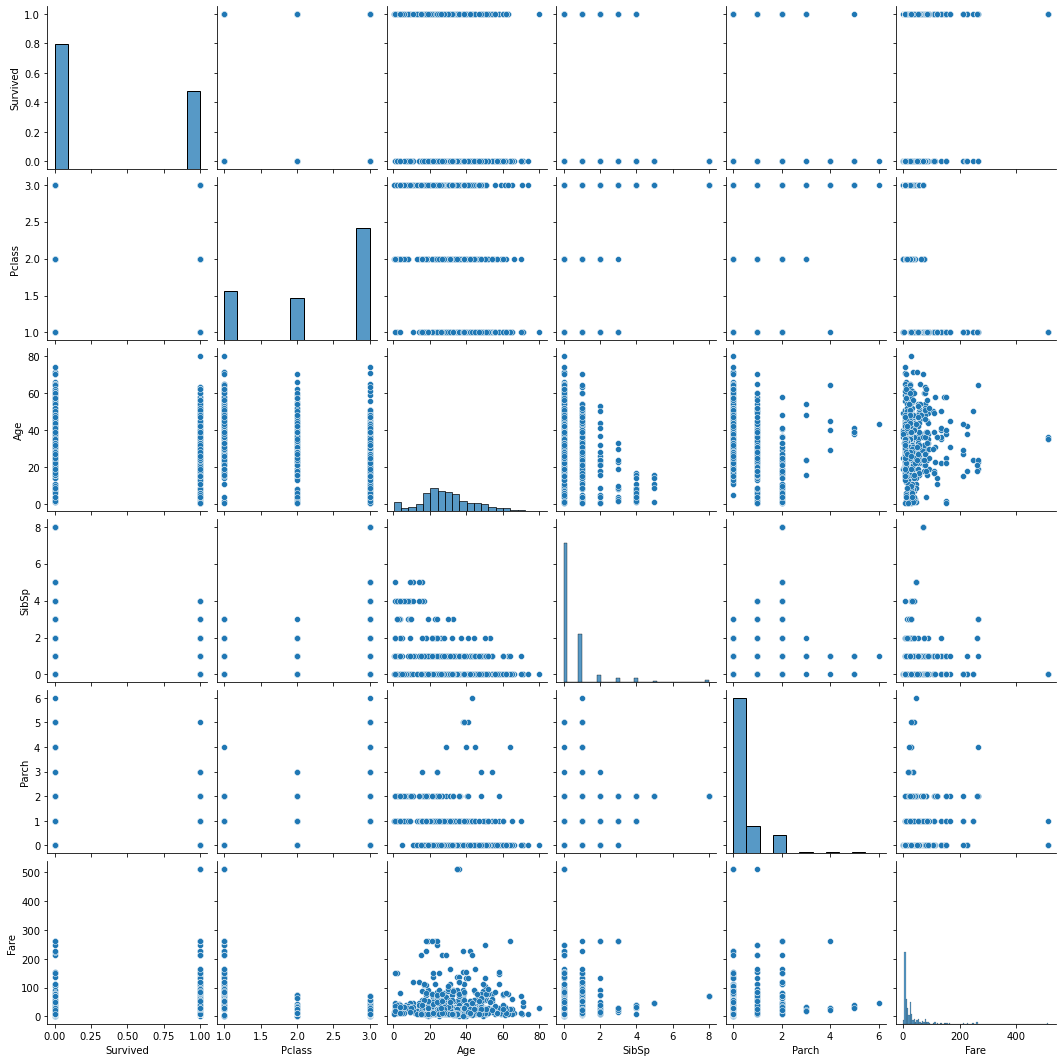

In [16]:
sns.pairplot(df)

The pairplot shows scatter plot + histogram showing us the outliers as well as the skewness data.

In [17]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### Scatterplot:

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

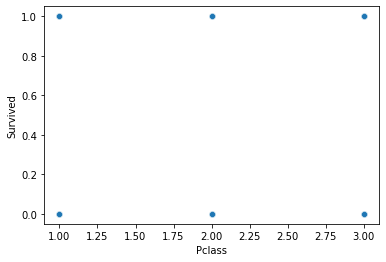

In [18]:
sns.scatterplot(x="Pclass",y="Survived",data=df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

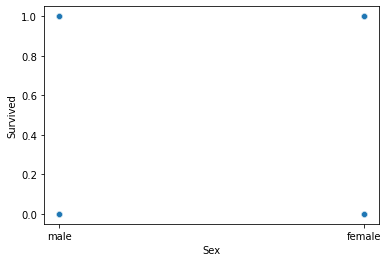

In [19]:
sns.scatterplot(x="Sex",y="Survived",data=df)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

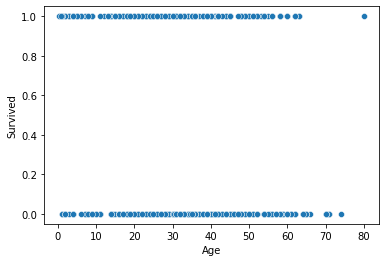

In [20]:
sns.scatterplot(x="Age",y="Survived",data=df)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

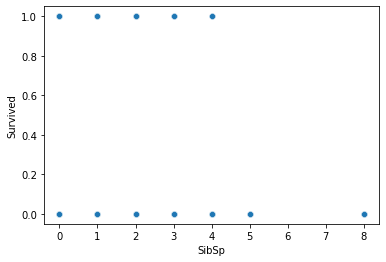

In [21]:
sns.scatterplot(x="SibSp",y="Survived",data=df)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

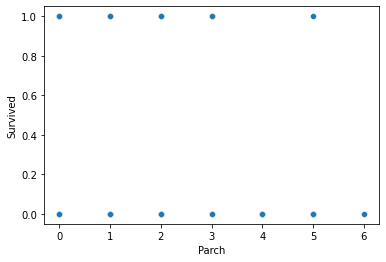

In [22]:
sns.scatterplot(x="Parch",y="Survived",data=df)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

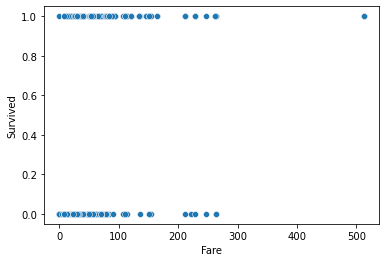

In [23]:
sns.scatterplot(x="Fare",y="Survived",data=df)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

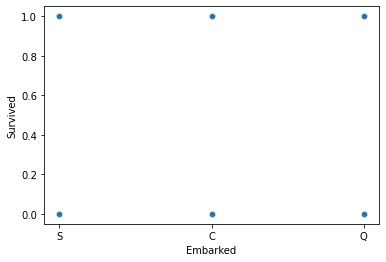

In [24]:
sns.scatterplot(x="Embarked",y="Survived",data=df)

We can see the ranges of the different columns from the above scatter plot and their relationship with the Survived column

### Barplot:

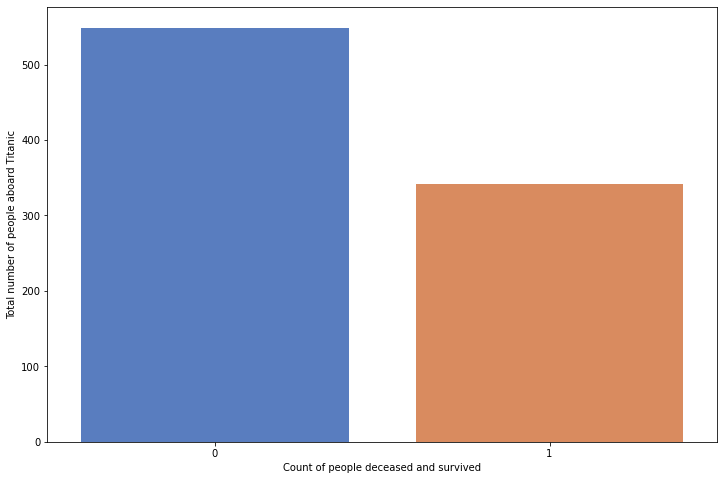

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(x ='Survived', data = df, palette ='muted')
plt.xlabel('Count of people deceased and survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

In the above count plot 0 depicts the number of people deceased and 1 depicts the people who survived the sinking. We can see that more number of people drowned when the Titanic was sinking and one's who survived represent a lesser number in comparison.

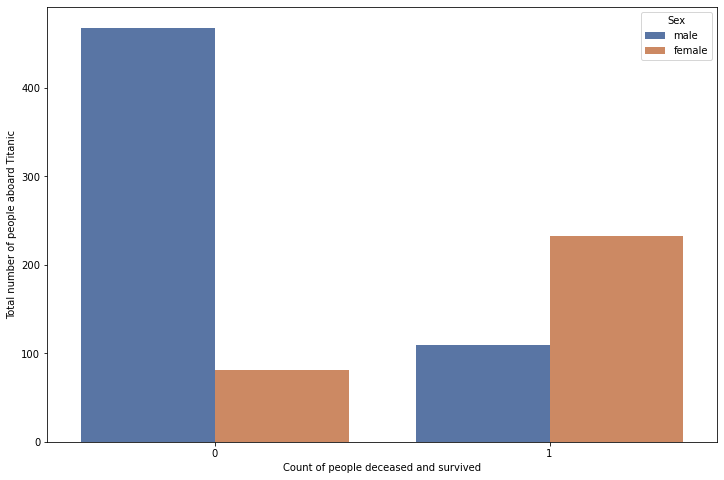

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(x ='Survived', data = df, hue='Sex',palette="deep")
plt.xlabel('Count of people deceased and survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

In the countplot of sex column it shows us a representation on how more men died when compared to women since in Titanic the rescue operations prioritized the life boat usage for women and children.

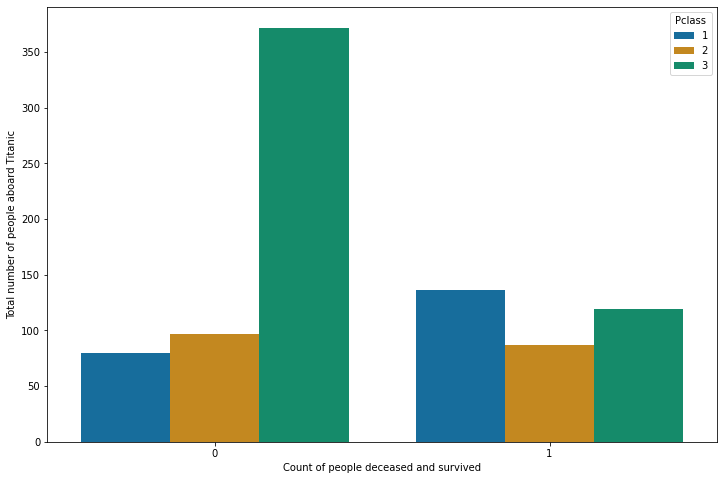

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x ='Survived', data = df, hue='Pclass', palette="colorblind")
plt.xlabel('Count of people deceased and survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

the highest number of deaths happened for class 3 since the  the rescue team gave priority based on class and passengers from class 1 were rescued first then class 2 and by the time class 3 were being rescued they ran out of life boats and titanic had almost sank

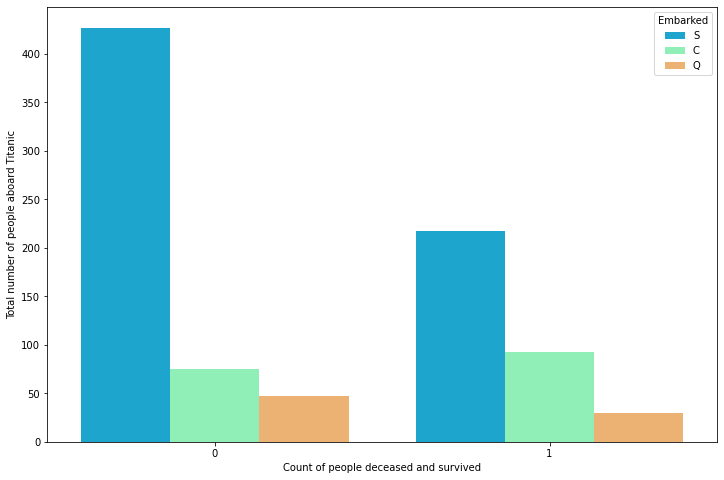

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x ='Survived', data = df, hue='Embarked', palette="rainbow")
plt.xlabel('Count of people deceased and survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

people who travelled from S=Southampton have dies the most compared to the other 2 ports C = Cherbourg and Q = Queenstown

### Voilin Plot:

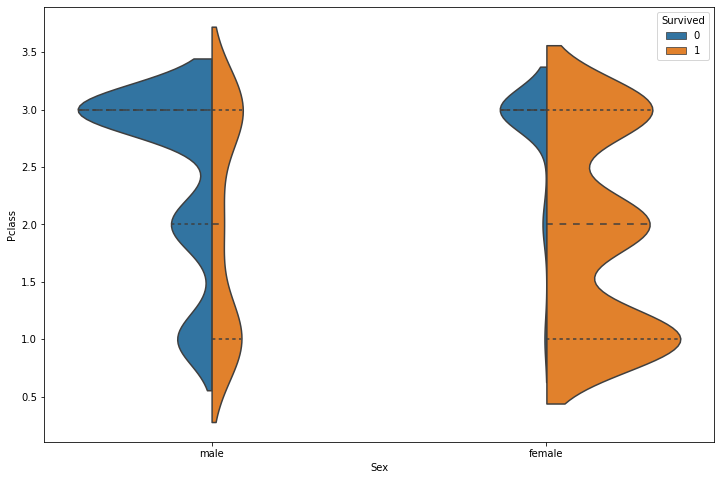

In [29]:
plt.figure(figsize=(12,8))
sns.violinplot(x="Sex", y="Pclass", hue="Survived", data=df, split=True, scale="count", inner="quartile")
plt.show()

In the above plot when comparing the gender with passenger class we see that the male who were in class 3 died in higher numbers as they were least prioritized.

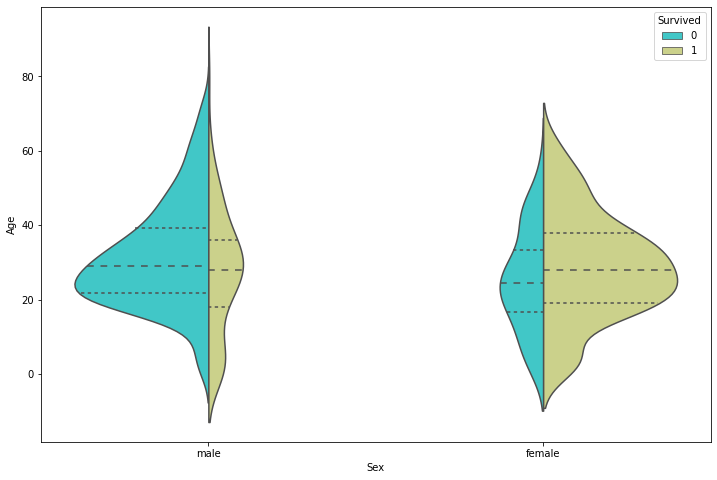

In [30]:
plt.figure(figsize=(12,8))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, palette="rainbow", split=True, scale="count", inner="quartile")
plt.show()

The above shows that the females who survived were averagely in their 30's similarly the males who drowned were averagely in their 30's.

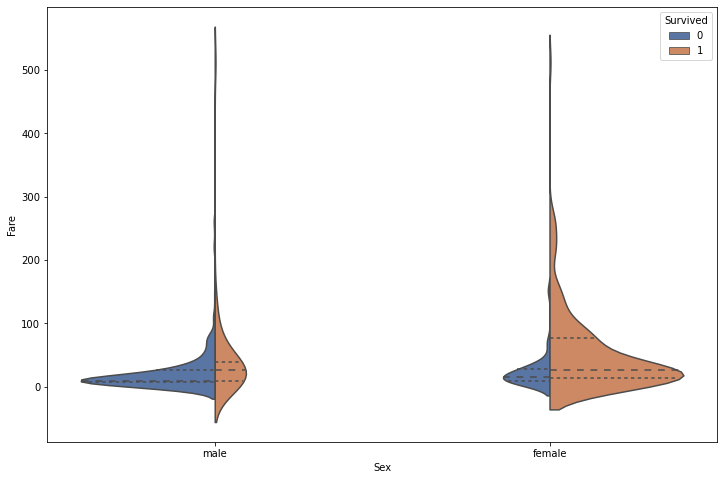

In [31]:
plt.figure(figsize=(12,8))
sns.violinplot(x="Sex", y="Fare", hue="Survived", data=df, palette="deep", split=True, scale="count", inner="quartile")
plt.show()

plotting against the fare column displays that the men who paid the least fare were not allowed to get on the life boats causing them to drown indicating that low priced fare meant a lower class passenger and hence a lower priority over rescuing.

## Filling the missing values

In [32]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

There are missing values in "Age" and "Embarked" columns. We will use mean method for "Age" and mode option for "Embarked" column.

Box plot

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

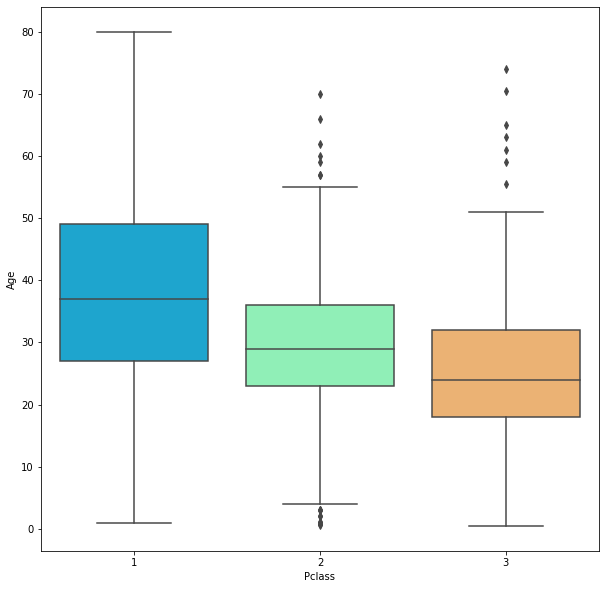

In [33]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass', y='Age', data=df, palette="rainbow")

We will check the average age of a person in that particular class cause in each class as per the above box plot the age average varies.

In the above boxplot it shows that the class 1 people who are wealthy are above the average age of the other class 2 and the class 3 average ages.

as per the observations from the boxplot to get the average age based on the class of travel. In class 1 we see average age as 37, for class 2 the average age is around 29 and class 3 has an avergae age of 24

In [34]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

We created a function after applying the above observations from the boxplot. We can use this function to fill the missing age values.

In [35]:
df["Age"] = df[["Age","Pclass"]].apply(fill_age, axis=1)

Using our fill_age function we have now added the average years data into the age column as per the classes.

In [36]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

We used mode option to fill the missing data in "Embarked" column with the most frequent value in column wise.

In [37]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Hence we have successfully filled all the missing data's

## Encoding

In [38]:
df = pd.get_dummies(df)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


We will use the pandas get_dummies method to encode the categorical object datatype 'Sex' and 'Embarked' columns. Since get_dummies uses the One Hot Encoding mechanism we will get extra columns where the rows are converted to indicator variables.

# Summary Statistics:

In [39]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


We can get the maximum, minimum, mean and standard deviation values of the data set using df.describe

we can observe that the age, SibSp, Parch and fare have huge difference between max and 75% indicating outliers.

# Checking Correlation:

In [40]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.074053
Age,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784,-0.078421,0.078421,0.040700,-0.081658,0.015733
SibSp,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.162184
Sex_female,0.543351,-0.131900,-0.078421,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.119224
Sex_male,-0.543351,0.131900,0.078421,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,0.168240,-0.243292,0.040700,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.221009,-0.081658,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.499421


<AxesSubplot:>

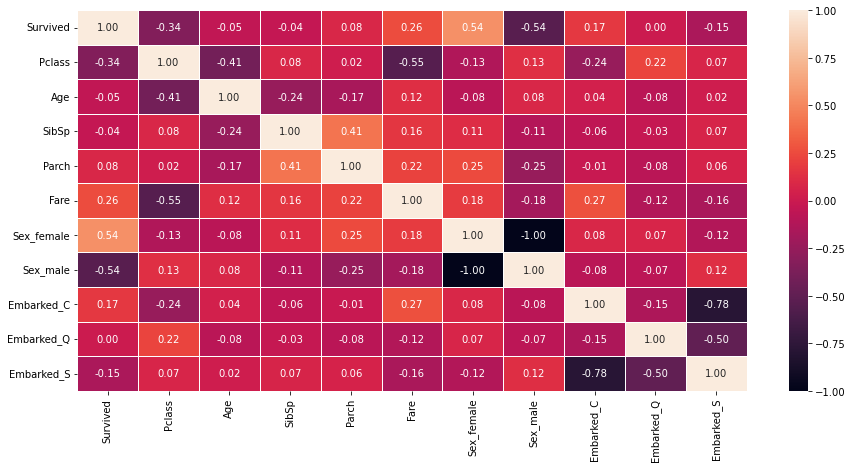

In [41]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt='.2f')

In [42]:
df.corr()['Survived'].sort_values()

Sex_male     -0.543351
Pclass       -0.338481
Embarked_S   -0.149683
Age          -0.047255
SibSp        -0.035322
Embarked_Q    0.003650
Parch         0.081629
Embarked_C    0.168240
Fare          0.257307
Sex_female    0.543351
Survived      1.000000
Name: Survived, dtype: float64

We can see that the Sex_male has the most negative correlation vs Survived column followed by Pclass.

We can see that the Sex_female has the most correlation vs Survived column.

female column is a perfect negative correlation to male column since the higher the number of female survivors the lower the number of male survivors


We cant drop any of the columns since the values are all real and all the columns would be required while predicting survival

# Outlier Checking

In [43]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

Survived         AxesSubplot(0.125,0.657941;0.168478x0.222059)
Pclass        AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Age           AxesSubplot(0.529348,0.657941;0.168478x0.222059)
SibSp         AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Parch            AxesSubplot(0.125,0.391471;0.168478x0.222059)
Fare          AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Sex_female    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Sex_male      AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Embarked_C          AxesSubplot(0.125,0.125;0.168478x0.222059)
Embarked_Q       AxesSubplot(0.327174,0.125;0.168478x0.222059)
Embarked_S       AxesSubplot(0.529348,0.125;0.168478x0.222059)
dtype: object

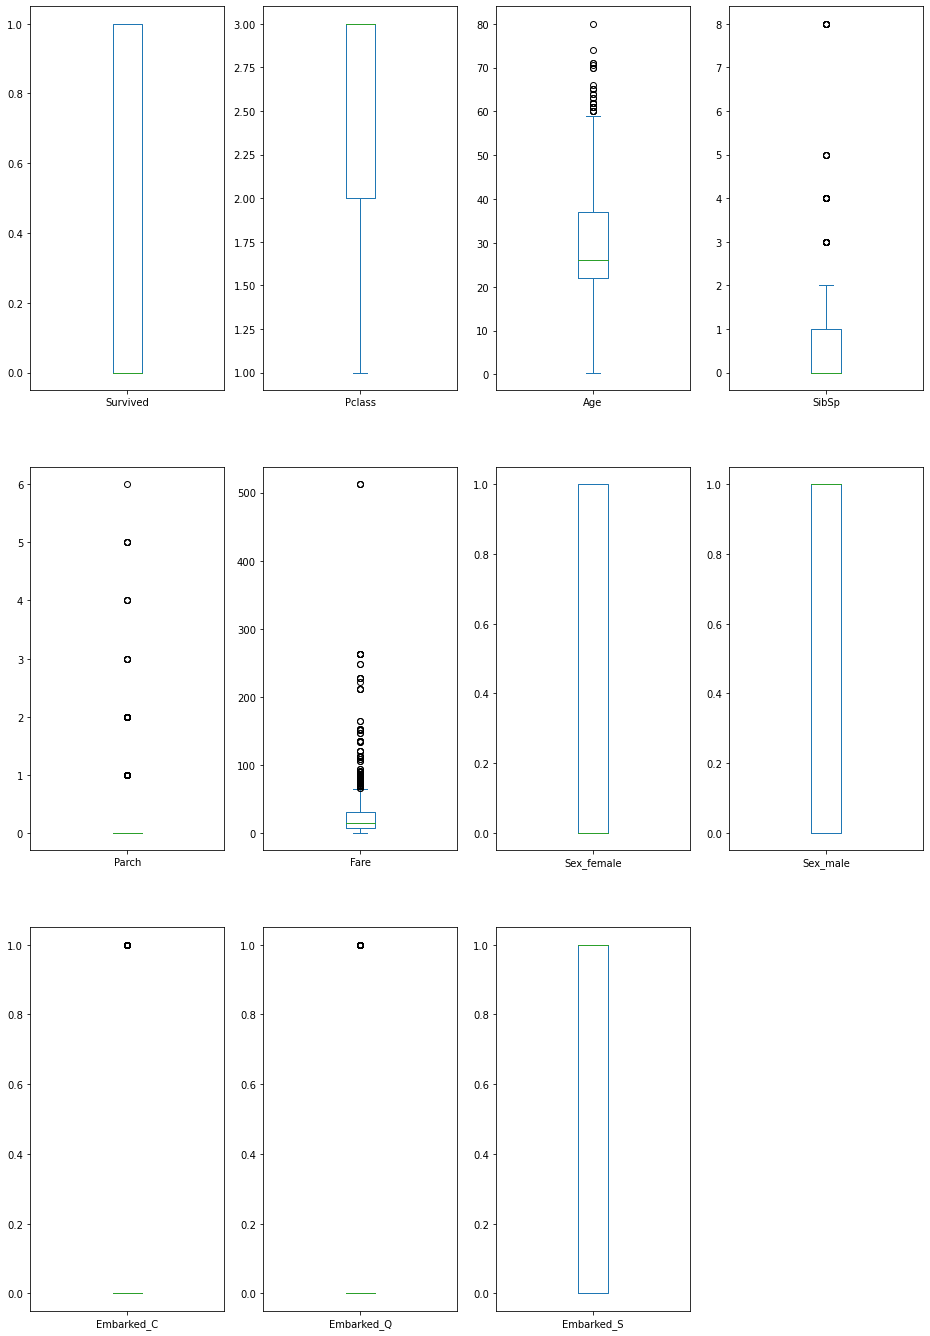

In [44]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(16,24))

We can see that Fare column has highest outliers.

SibSp, Parch and Age has moderate outliers.

# Checking Skewness:

In [45]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='Density'>

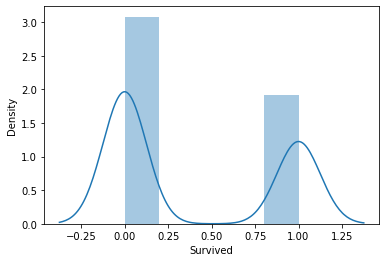

In [46]:
sns.distplot(df['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

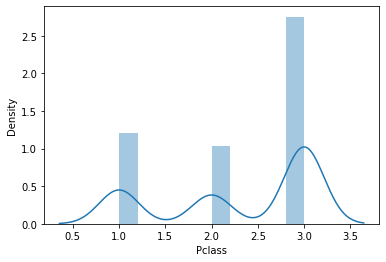

In [47]:
sns.distplot(df['Pclass'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

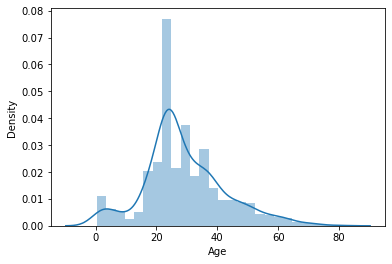

In [48]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

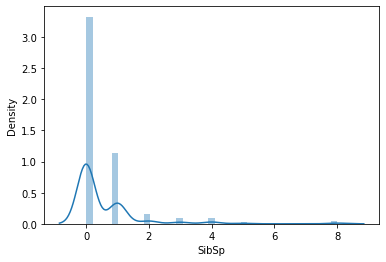

In [49]:
sns.distplot(df['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

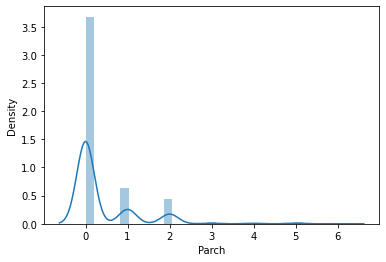

In [50]:
sns.distplot(df['Parch'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

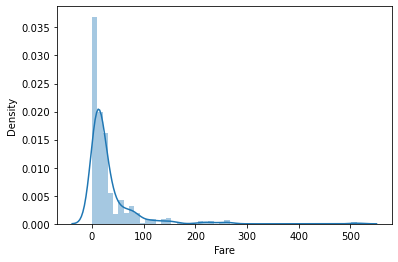

In [51]:
sns.distplot(df['Fare'])

<AxesSubplot:xlabel='Sex_female', ylabel='Density'>

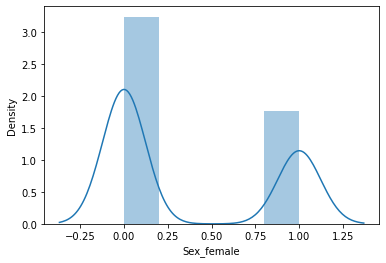

In [52]:
sns.distplot(df['Sex_female'])

<AxesSubplot:xlabel='Sex_male', ylabel='Density'>

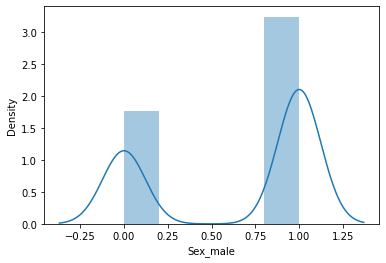

In [53]:
sns.distplot(df['Sex_male'])

<AxesSubplot:xlabel='Embarked_C', ylabel='Density'>

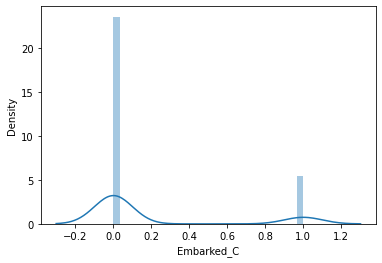

In [54]:
sns.distplot(df['Embarked_C'])

<AxesSubplot:xlabel='Embarked_Q', ylabel='Density'>

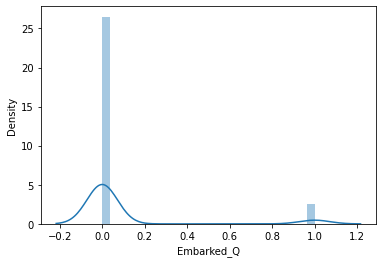

In [55]:
sns.distplot(df['Embarked_Q'])

<AxesSubplot:xlabel='Embarked_S', ylabel='Density'>

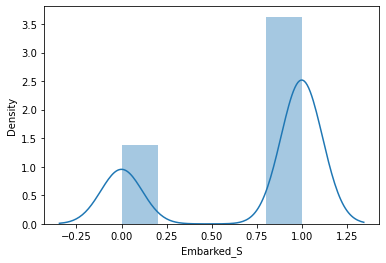

In [56]:
sns.distplot(df['Embarked_S'])

In [57]:
df.skew()

Survived      0.478523
Pclass       -0.630548
Age           0.548256
SibSp         3.695352
Parch         2.749117
Fare          4.787317
Sex_female    0.618921
Sex_male     -0.618921
Embarked_C    1.595149
Embarked_Q    2.948778
Embarked_S   -1.009665
dtype: float64

In [58]:
df.skew().sort_values()

Embarked_S   -1.009665
Pclass       -0.630548
Sex_male     -0.618921
Survived      0.478523
Age           0.548256
Sex_female    0.618921
Embarked_C    1.595149
Parch         2.749117
Embarked_Q    2.948778
SibSp         3.695352
Fare          4.787317
dtype: float64

we see that the presence of outliers are affecting the distribution plot and causing skewness.

Also the skewness threshold is +/-0.5 hence all the columns except for survived column looks like it would need to be adjusted to correct the skewness.

# MultiCollinearity with Variance Inflation Factor

In [59]:
df1=pd.DataFrame(data=df)       # copying the dataframe
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [60]:
x1=df1.iloc[:,1:]
y1=df1.iloc[:,0]

In [61]:
x1

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [62]:
y1

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [63]:
x1.shape

(891, 10)

In [64]:
y1.shape

(891,)

In [65]:
x1.shape[1]    # 10 number of columns

10

In [66]:
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [68]:
calc_vif(x1)

,variables,VIF FACTOR
0,Pclass,1.859201
1,Age,1.302082
2,SibSp,1.288840
3,Parch,1.330904
4,Fare,1.650887
5,Sex_female,inf
6,Sex_male,inf
7,Embarked_C,inf
8,Embarked_Q,inf
9,Embarked_S,inf


Since the values of the non categorical columns are all less than 5 we can say that the variables are not having MultiCollinearity. 

# Splitting the dataset into Features and Target

In [69]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [70]:
X = df.iloc[:,1:]       # Capital X
y = df.iloc[:,0]

In [71]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [72]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [73]:
X.shape

(891, 10)

In [74]:
y.shape

(891,)

# Data Preprocessing

The usage of Z score and IQR methods gave a data loss of more than 15 percent which I could not afford on my current data set. Hence I have not removed the outliers.

### Transformation:

In [75]:
X.skew()

Pclass       -0.630548
Age           0.548256
SibSp         3.695352
Parch         2.749117
Fare          4.787317
Sex_female    0.618921
Sex_male     -0.618921
Embarked_C    1.595149
Embarked_Q    2.948778
Embarked_S   -1.009665
dtype: float64

Apart from the Pclass and the One Hot encoded columns (5-9) removing skewness from SibSp ,Parch and Fare columns 

In [76]:
X['SibSp'] = np.sqrt(X['SibSp'])

In [77]:
X['SibSp'].skew()

1.436526474694446

In [78]:
X['Parch'] = np.sqrt(X['Parch'])

In [79]:
X['Parch'].skew()

1.5297990732860154

In [80]:
X['Fare'] = np.sqrt(X['Fare'])

In [81]:
X['Fare'].skew()

2.08500441820235

In [82]:
X.skew()

Pclass       -0.630548
Age           0.548256
SibSp         1.436526
Parch         1.529799
Fare          2.085004
Sex_female    0.618921
Sex_male     -0.618921
Embarked_C    1.595149
Embarked_Q    2.948778
Embarked_S   -1.009665
dtype: float64

In [83]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1.0,0.000000,2.692582,0,1,0,0,1
1,1,38.0,1.0,0.000000,8.442944,1,0,1,0,0
2,3,26.0,0.0,0.000000,2.815138,1,0,0,0,1
3,1,35.0,1.0,0.000000,7.286975,1,0,0,0,1
4,3,35.0,0.0,0.000000,2.837252,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0.0,0.000000,3.605551,0,1,0,0,1
887,1,19.0,0.0,0.000000,5.477226,1,0,0,0,1
888,3,24.0,1.0,1.414214,4.842520,1,0,0,0,1
889,1,26.0,0.0,0.000000,5.477226,0,1,1,0,0


<AxesSubplot:xlabel='SibSp', ylabel='Density'>

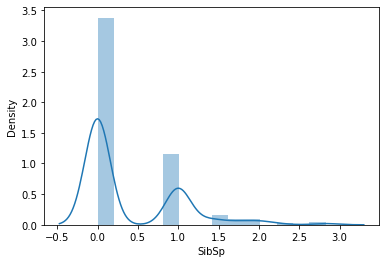

In [84]:
sns.distplot(X['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

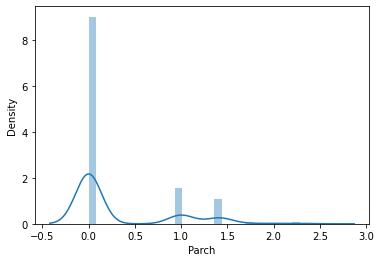

In [85]:
sns.distplot(X['Parch'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

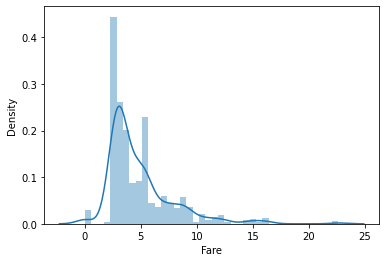

In [86]:
sns.distplot(X['Fare'])

Hence skewness has been somewhat reduced due to square root transform.

### Feature Scaling

In [87]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(X)
x1

array([[ 0.82737724, -0.53383369,  1.00440956, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.67489052,  1.00440956, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.23165264, -0.62953745, ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724, -0.38274316,  1.00440956, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.23165264, -0.62953745, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.22161894, -0.62953745, ..., -0.48204268,
         3.25137334, -1.62380254]])

In [88]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [89]:
x = pd.DataFrame(x1,columns=X.columns)

In [90]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.533834,1.004410,-0.539747,-0.733117,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.674891,1.004410,-0.539747,1.219822,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.231653,-0.629537,-0.539747,-0.691495,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.448255,1.004410,-0.539747,0.827232,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.448255,-0.629537,-0.539747,-0.683984,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.156107,-0.629537,-0.539747,-0.423054,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,-1.566107,-0.760469,-0.629537,-0.539747,0.212604,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,0.827377,-0.382743,1.004410,2.061805,-0.002955,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,-1.566107,-0.231653,-0.629537,-0.539747,0.212604,-0.737695,0.737695,2.074505,-0.307562,-1.623803


Hencce all the feature columns have been scaled so that there is no bias towards a single feature.

In [91]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

our target column is kept as it is and since its a categorical variable we will use Logistic Regression

# Machine Learning

### Finding Best Random State

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [93]:
maxAccu = 0   # maximum accuracy
maxRS = 0     # best random state value for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    print('accuracy', acc, 'random_state', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('accuracy', maxAccu, 'random_state              ', maxRS)

accuracy 0.7988826815642458 random_state 1
accuracy 0.7988826815642458 random_state               1
accuracy 0.7821229050279329 random_state 2
accuracy 0.7597765363128491 random_state 3
accuracy 0.8268156424581006 random_state 4
accuracy 0.8268156424581006 random_state               4
accuracy 0.8268156424581006 random_state 5
accuracy 0.8603351955307262 random_state 6
accuracy 0.8603351955307262 random_state               6
accuracy 0.7486033519553073 random_state 7
accuracy 0.7597765363128491 random_state 8
accuracy 0.770949720670391 random_state 9
accuracy 0.8268156424581006 random_state 10
accuracy 0.8659217877094972 random_state 11
accuracy 0.8659217877094972 random_state               11
accuracy 0.770949720670391 random_state 12
accuracy 0.8379888268156425 random_state 13
accuracy 0.8044692737430168 random_state 14
accuracy 0.8156424581005587 random_state 15
accuracy 0.7374301675977654 random_state 16
accuracy 0.770949720670391 random_state 17
accuracy 0.8547486033519553 random_

We have found best random_state value as 11. We will create our train_test_split using this random_state

In [94]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [95]:
# creating a function to run all the classifiers

def classifier(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=11)  # random_state 11 was the best random_state
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

### Logistic Regression

In [96]:
model = LogisticRegression()
classifier(model, x, y)

Accuracy Score: 86.59217877094973

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       118
           1       0.82      0.77      0.80        61

    accuracy                           0.87       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.86      0.87      0.86       179

Cross Validation Score: 79.80101688531794

Accuracy Score - Cross Validation Score is 6.791161885631794


### Gaussian Naive Bayes

In [97]:
model = GaussianNB()
classifier(model, x, y)

Accuracy Score: 83.24022346368714

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       118
           1       0.72      0.82      0.77        61

    accuracy                           0.83       179
   macro avg       0.81      0.83      0.82       179
weighted avg       0.84      0.83      0.83       179

Cross Validation Score: 77.4439771514657

Accuracy Score - Cross Validation Score is 5.796246312221442


### SVC Classifier

In [98]:
model = SVC(kernel='rbf')
classifier(model, x, y)

Accuracy Score: 88.26815642458101

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.92       118
           1       0.93      0.70      0.80        61

    accuracy                           0.88       179
   macro avg       0.90      0.84      0.86       179
weighted avg       0.89      0.88      0.88       179

Cross Validation Score: 82.26664992781369

Accuracy Score - Cross Validation Score is 6.00150649676732


In [99]:
model = SVC(kernel='linear')
classifier(model, x, y)

Accuracy Score: 83.24022346368714

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       118
           1       0.75      0.75      0.75        61

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

Cross Validation Score: 78.67365513778168

Accuracy Score - Cross Validation Score is 4.566568325905465


In [100]:
model = SVC(kernel='poly')
classifier(model, x, y)

Accuracy Score: 88.26815642458101

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       118
           1       0.87      0.77      0.82        61

    accuracy                           0.88       179
   macro avg       0.88      0.86      0.87       179
weighted avg       0.88      0.88      0.88       179

Cross Validation Score: 81.37028435126483

Accuracy Score - Cross Validation Score is 6.897872073316179


### Decision Tree Classifier

In [101]:
model = DecisionTreeClassifier()
classifier(model, x, y)

Accuracy Score: 77.09497206703911

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       118
           1       0.66      0.67      0.67        61

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179

Cross Validation Score: 78.12001757579561

Accuracy Score - Cross Validation Score is -1.0250455087565058


### KNeighbors Classifier

In [102]:
model = KNeighborsClassifier()
classifier(model, x, y)

Accuracy Score: 85.47486033519553

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       118
           1       0.82      0.74      0.78        61

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179

Cross Validation Score: 80.92084614901765

Accuracy Score - Cross Validation Score is 4.554014186177881


### SGD Classifier

In [103]:
model = SGDClassifier()
classifier(model, x, y)

Accuracy Score: 75.41899441340783

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       118
           1       0.65      0.59      0.62        61

    accuracy                           0.75       179
   macro avg       0.73      0.71      0.72       179
weighted avg       0.75      0.75      0.75       179

Cross Validation Score: 71.8529910237901

Accuracy Score - Cross Validation Score is 3.566003389617734


### Random Forest Classifier

In [104]:
model = RandomForestClassifier(random_state=11)
classifier(model, x, y)

Accuracy Score: 84.91620111731844

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       118
           1       0.79      0.75      0.77        61

    accuracy                           0.85       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179

Cross Validation Score: 81.70799070993662

Accuracy Score - Cross Validation Score is 3.208210407381813


### ExtraTrees Classifier

In [105]:
model = ExtraTreesClassifier()
classifier(model, x, y)

Accuracy Score: 82.12290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       118
           1       0.75      0.72      0.73        61

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

Cross Validation Score: 78.90214048082356

Accuracy Score - Cross Validation Score is 3.220764547109397


### AdaBoost Classifier

In [106]:
model = AdaBoostClassifier()
classifier(model, x, y)

Accuracy Score: 84.35754189944134

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       118
           1       0.76      0.79      0.77        61

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Cross Validation Score: 81.26231874960767

Accuracy Score - Cross Validation Score is 3.0952231498336715


### Gradient Boosting Classifier

In [107]:
model = GradientBoostingClassifier()
classifier(model, x, y)

Accuracy Score: 87.15083798882681

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91       118
           1       0.87      0.74      0.80        61

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.87       179

Cross Validation Score: 82.71859895800642

Accuracy Score - Cross Validation Score is 4.432239030820384


Since SVC(kernel='rbf') gives the best Accuracy Score: 88.268 and the Accuracy Score - Cross Validation Score is 6.0015 hence we took SVC for hyper parameter tuning.

# Hyper Parameter Tuning

In [110]:
#SVC?

In [111]:
# creating parameters list to pass into GridSearchCV

parameters = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [4, 6, 11],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr']}

In [112]:
GCV = GridSearchCV(SVC(), parameters, cv=5)

In [113]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [4, 6, 11],
                         'shrinking': [True, False]})

In [114]:
GCV.best_params_      # printing best parameters found by GridSearchCV

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 4,
 'shrinking': True}

We got the best parameters using Gridsearch CV

In [115]:
final_model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=4, shrinking=True)   # final model with best parameters

In [116]:
final_fit = final_model.fit(x_train,y_train)   # final fit

In [117]:
final_pred = final_model.predict(x_test)   # predicting with best parameters

In [118]:
best_acc_score = (accuracy_score(y_test, final_pred))*100    # checking accuracy score
print("The Accuracy Score for the Best Model is ", best_acc_score)

The Accuracy Score for the Best Model is  80.44692737430168


We successfully performed the Hyper Parameter Tuning on the Final Model.

In [119]:
# Final Cross Validation Score
final_cv_score = (cross_val_score(final_model, x, y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 82.26664992781369


We got final accuracy score of 80.4469% and Cross Validation Score of 82.266% which is good

# AUC ROC curve

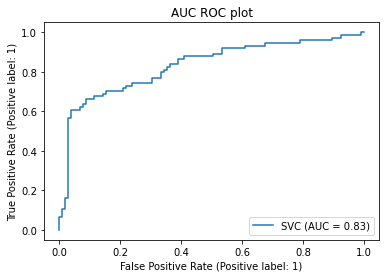

In [120]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_model, x_test, y_test)
plt.title("AUC ROC plot")
plt.show()

final accuracy score is 80.4469% and AUC score is 83% which is good

# Final Classification Report

In [121]:
final_class_report = classification_report(y_test, final_pred)
print("The Final Classification Report:\n", final_class_report)

The Final Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.85       105
           1       0.85      0.64      0.73        74

    accuracy                           0.80       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



# Final Confusion Matrix

In [122]:
print(confusion_matrix(y_test,final_pred))

[[97  8]
 [27 47]]


# Saving the model in pickle Format

In [123]:
# pickeling or serialization of a file
import pickle
filename = 'Titanic_Project.pkl'
pickle.dump(final_model, open(filename, 'wb'))

# Prediction Conclusion:

In [124]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_comparison = pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_comparison

,original,predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,0
...,...,...
174,0,0
175,1,1
176,0,0
177,1,1


In [125]:
df_comparison.to_csv('Titanic_survival_prediction.csv')

Hence predicting if an arbitrary passenger on Titanic would survive the sinking or not